In [1]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [5]:
print(mpl.__version__)

3.5.2


# US County Boundary

In [46]:
file = 'data/gz_2010_us_050_00_500k/gz_2010_us_050_00_500k.shp'
county = gpd.read_file(file)

In [47]:
county

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663..."
...,...,...,...,...,...,...,...
3216,0500000US72131,72,131,San Sebastián,Muno,70.423,"POLYGON ((-66.90748 18.25314, -66.90739 18.253..."
3217,0500000US72133,72,133,Santa Isabel,Muno,34.023,"POLYGON ((-66.37968 17.94398, -66.38029 17.943..."
3218,0500000US72137,72,137,Toa Baja,Muno,23.241,"MULTIPOLYGON (((-66.13957 18.46232, -66.13956 ..."
3219,0500000US72139,72,139,Trujillo Alto,Muno,20.764,"POLYGON ((-66.02917 18.37590, -66.02828 18.376..."


In [48]:
county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_ID      3221 non-null   object  
 1   STATE       3221 non-null   object  
 2   COUNTY      3221 non-null   object  
 3   NAME        3221 non-null   object  
 4   LSAD        3219 non-null   object  
 5   CENSUSAREA  3221 non-null   float64 
 6   geometry    3221 non-null   geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 176.3+ KB


In [59]:
file = 'data/Book3.xlsx'
hpi09 = pd.read_excel(file)

In [61]:
hpi09

,Column1,Column2,Column3,Column4,Column5
0,ATNHPIUS01001A,"Autauga County, AL",1001,0500000US01001,132.09
1,ATNHPIUS01003A,"Baldwin County, AL",1003,0500000US01003,141.82
2,ATNHPIUS01005A,"Barbour County, AL",1005,0500000US01005,133.12
3,ATNHPIUS01007A,"Bibb County, AL",1007,0500000US01007,131.94
4,ATNHPIUS01009A,"Blount County, AL",1009,0500000US01009,128.45
...,...,...,...,...,...
2390,ATNHPIUS56037A,"Sweetwater County, WY",56037,0500000US56037,180.02
2391,ATNHPIUS56039A,"Teton County, WY",56039,0500000US56039,190.18
2392,ATNHPIUS56041A,"Uinta County, WY",56041,0500000US56041,186.92
2393,ATNHPIUS56043A,"Washakie County, WY",56043,0500000US56043,165.79


In [62]:
hpi09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  2395 non-null   object 
 1   Column2  2395 non-null   object 
 2   Column3  2395 non-null   int64  
 3   Column4  2395 non-null   object 
 4   Column5  2395 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 93.7+ KB


In [88]:
hpi09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  2395 non-null   object 
 1   Column2  2395 non-null   object 
 2   Column3  2395 non-null   int64  
 3   GEO_ID   2395 non-null   object 
 4   Column5  2395 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 93.7+ KB


In [63]:
# rename the states
hpi09.rename(columns={'Column4': 'GEO_ID'}, inplace=True)

<AxesSubplot:>

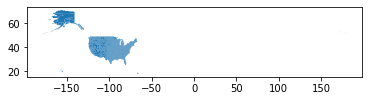

In [65]:
# Join housing file cases data with USA boundary by attribute NAME
hpi09_gdf = county.merge(hpi09, on = 'GEO_ID', how = 'left')
hpi09_gdf.plot()

In [89]:
hpi09_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3221 entries, 0 to 3220
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_ID      3221 non-null   object  
 1   STATE       3221 non-null   object  
 2   COUNTY      3221 non-null   object  
 3   NAME        3221 non-null   object  
 4   LSAD        3219 non-null   object  
 5   CENSUSAREA  3221 non-null   float64 
 6   geometry    3221 non-null   geometry
 7   Column1     2395 non-null   object  
 8   Column2     2395 non-null   object  
 9   Column3     2395 non-null   float64 
 10  Column5     2395 non-null   float64 
dtypes: float64(3), geometry(1), object(7)
memory usage: 302.0+ KB


In [90]:
hpi09_gdf = hpi09_gdf.dropna()

In [101]:
hpi09_gdf

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Column1,Column2,Column3,Column5
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",ATNHPIUS01029A,"Cleburne County, AL",1029.0,144.19
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",ATNHPIUS01031A,"Coffee County, AL",1031.0,148.83
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",ATNHPIUS01039A,"Covington County, AL",1039.0,142.98
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",ATNHPIUS01041A,"Crenshaw County, AL",1041.0,151.03
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.79043 31.32027, -85.79033 31.323...",ATNHPIUS01045A,"Dale County, AL",1045.0,142.60
...,...,...,...,...,...,...,...,...,...,...,...
3137,0500000US56025,56,025,Natrona,County,5340.352,"POLYGON ((-107.54353 42.78136, -107.54353 42.7...",ATNHPIUS56025A,"Natrona County, WY",56025.0,189.33
3139,0500000US56031,56,031,Platte,County,2084.208,"POLYGON ((-104.77417 42.60996, -104.76422 42.6...",ATNHPIUS56031A,"Platte County, WY",56031.0,154.63
3140,0500000US56037,56,037,Sweetwater,County,10426.649,"POLYGON ((-109.05008 41.00066, -109.17368 41.0...",ATNHPIUS56037A,"Sweetwater County, WY",56037.0,180.02
3141,0500000US56043,56,043,Washakie,County,2238.549,"POLYGON ((-107.12892 43.99455, -107.12797 43.9...",ATNHPIUS56043A,"Washakie County, WY",56043.0,165.79


In [93]:
#Export merged geodataframe into shapefile
hpi09_gdf.to_file("data/hpi09.geojson")

# Unemployment Rate

In [72]:
file = ('data/unemploy09.xlsx')
unemploy09 = pd.read_excel(file)

In [73]:
unemploy09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  3144 non-null   object 
 1   Column2  3144 non-null   object 
 2   Column3  3144 non-null   int64  
 3   Column4  3144 non-null   object 
 4   Column5  3139 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 122.9+ KB


In [74]:
# rename the states
unemploy09.rename(columns={'Column4': 'GEO_ID'}, inplace=True)

<AxesSubplot:>

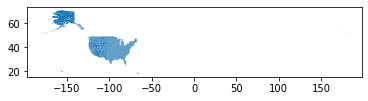

In [75]:
# Join housing file cases data with USA boundary by attribute NAME
unemploy09_gdf = county.merge(unemploy09, on = 'GEO_ID', how = 'left')
unemploy09_gdf.plot()

In [94]:
unemploy09_gdf = unemploy09_gdf.dropna()

In [96]:
#Export merged geodataframe into shapefile
unemploy09_gdf.to_file("data/unemploy09.geojson")

In [95]:
unemploy09_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3137 entries, 0 to 3145
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_ID      3137 non-null   object  
 1   STATE       3137 non-null   object  
 2   COUNTY      3137 non-null   object  
 3   NAME        3137 non-null   object  
 4   LSAD        3137 non-null   object  
 5   CENSUSAREA  3137 non-null   float64 
 6   geometry    3137 non-null   geometry
 7   Column1     3137 non-null   object  
 8   Column2     3137 non-null   object  
 9   Column3     3137 non-null   float64 
 10  Column5     3137 non-null   float64 
dtypes: float64(3), geometry(1), object(7)
memory usage: 294.1+ KB


# Income

In [77]:
file = ('data/income09.xlsx')
income09 = pd.read_excel(file)

In [78]:
income09

,Column1,Column2,Column3,Column32,Column4
0,MHIAL01001A052NCEN,"Autauga County, AL",1001,0500000US01001,53081.0
1,MHIAL01003A052NCEN,"Baldwin County, AL",1003,0500000US01003,48637.0
2,MHIAL01005A052NCEN,"Barbour County, AL",1005,0500000US01005,28802.0
3,MHIAL01007A052NCEN,"Bibb County, AL",1007,0500000US01007,38294.0
4,MHIAL01009A052NCEN,"Blount County, AL",1009,0500000US01009,41520.0
...,...,...,...,...,...
3138,MHIWY56037A052NCEN,"Sweetwater County, WY",56037,0500000US56037,69297.0
3139,MHIWY56039A052NCEN,"Teton County, WY",56039,0500000US56039,68777.0
3140,MHIWY56041A052NCEN,"Uinta County, WY",56041,0500000US56041,64284.0
3141,MHIWY56043A052NCEN,"Washakie County, WY",56043,0500000US56043,47098.0


In [83]:
# rename the states
income09.rename(columns={'Column32': 'GEO_ID'}, inplace=True)

<AxesSubplot:>

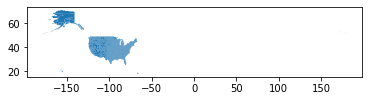

In [84]:
# Join housing file cases data with USA boundary by attribute NAME
income09_gdf = county.merge(income09, on = 'GEO_ID', how = 'left')
income09_gdf.plot()

In [98]:
income09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  3143 non-null   object 
 1   Column2  3143 non-null   object 
 2   Column3  3143 non-null   int64  
 3   GEO_ID   3143 non-null   object 
 4   Column4  3142 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 122.9+ KB


In [97]:
income09_gdf = income09_gdf.dropna()

In [99]:
income09_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3140 entries, 0 to 3142
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_ID      3140 non-null   object  
 1   STATE       3140 non-null   object  
 2   COUNTY      3140 non-null   object  
 3   NAME        3140 non-null   object  
 4   LSAD        3140 non-null   object  
 5   CENSUSAREA  3140 non-null   float64 
 6   geometry    3140 non-null   geometry
 7   Column1     3140 non-null   object  
 8   Column2     3140 non-null   object  
 9   Column3     3140 non-null   float64 
 10  Column4     3140 non-null   float64 
dtypes: float64(3), geometry(1), object(7)
memory usage: 294.4+ KB


In [100]:
#Export merged geodataframe into shapefile
income09_gdf.to_file("data/income09.geojson")

# GDP